In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("House_rent.csv")

In [3]:
dataset

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [4]:
dataset.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

# 1. What is the distribution of rent?

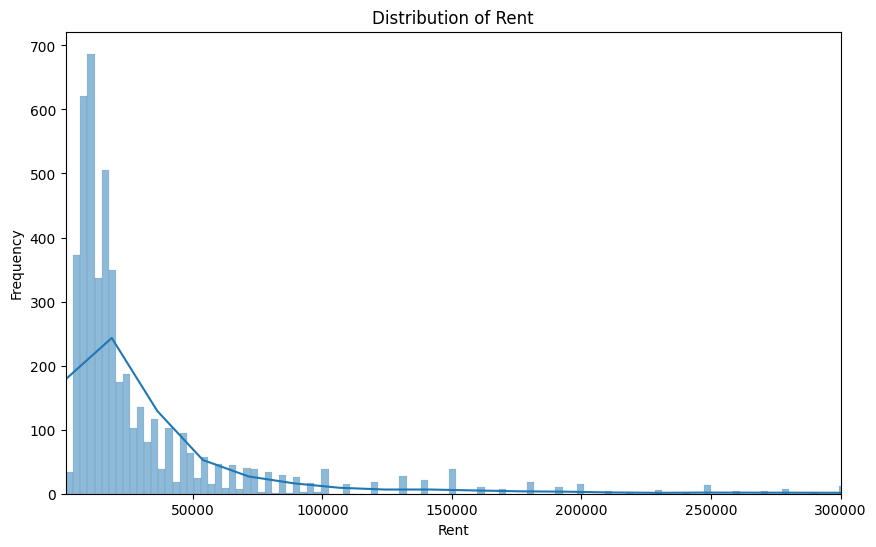

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the distribution of Rent
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Rent'], kde=True)
# Set x-axis range (For example, 0 to 400,000)
plt.xlim(1000, 300000)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


# 2. What is the distribution of the size of the house?

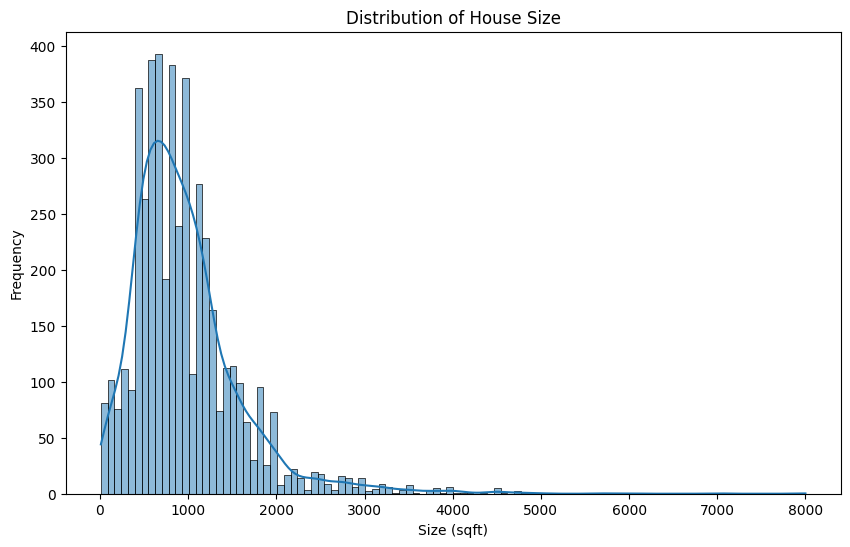

In [6]:
# Plotting the distribution of Size
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Size'], kde=True)
plt.title('Distribution of House Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()

# 3. What is the frequency of different Area Types?

In [7]:
# You can use .value_counts() to get the count of each unique value in a categorical column, followed by a bar plot to visualize the distribution.

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64


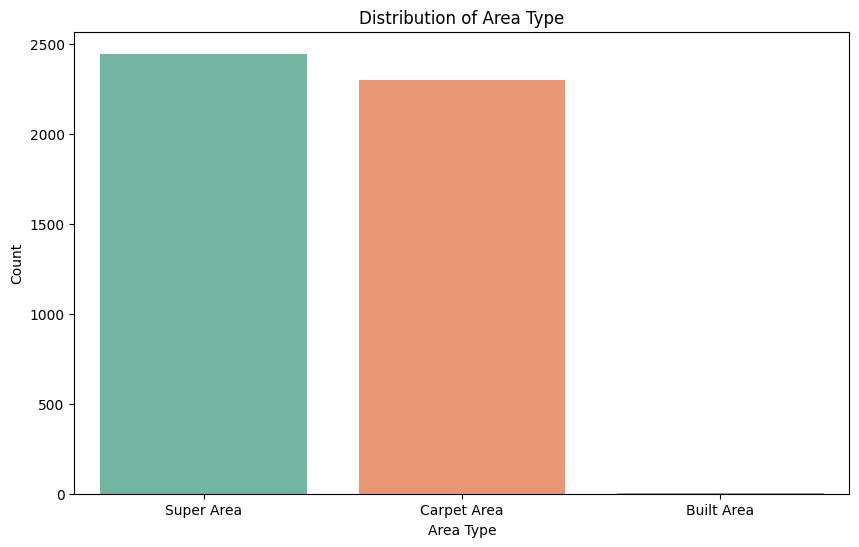

In [8]:
# Frequency of Area Type
print(dataset['Area Type'].value_counts())
# Plotting the distribution of Area Type
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['Area Type'],palette='Set2')
plt.title('Distribution of Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()


# 4. How does the `Rent` vary by `Furnishing Status`

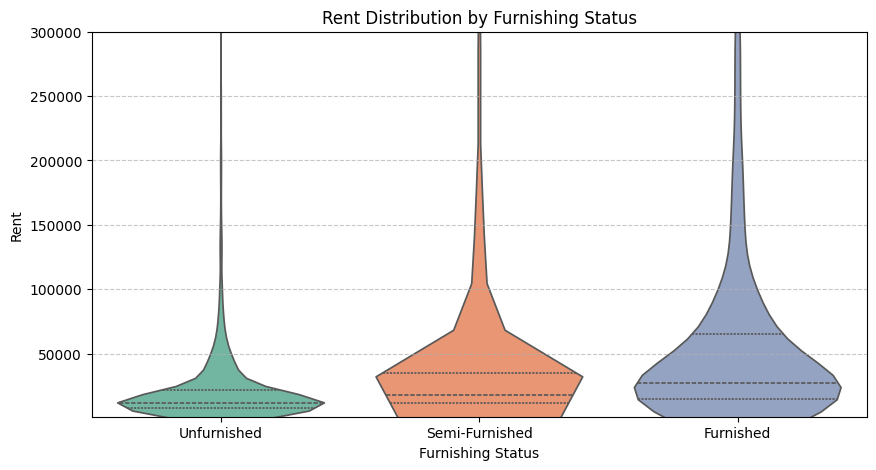

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(x="Furnishing Status", y="Rent", data=dataset, inner="quartile",palette='Set2')

# Set y-axis range (For example, 0 to 400,000)
plt.ylim(1000, 300000)

plt.title("Rent Distribution by Furnishing Status")
plt.ylabel("Rent")
plt.xlabel("Furnishing Status")
plt.grid(True, axis='y', linestyle="--", alpha=0.7)
plt.show()

# 5. How does the `Rent` vary by `BHK` (number of bedrooms)?

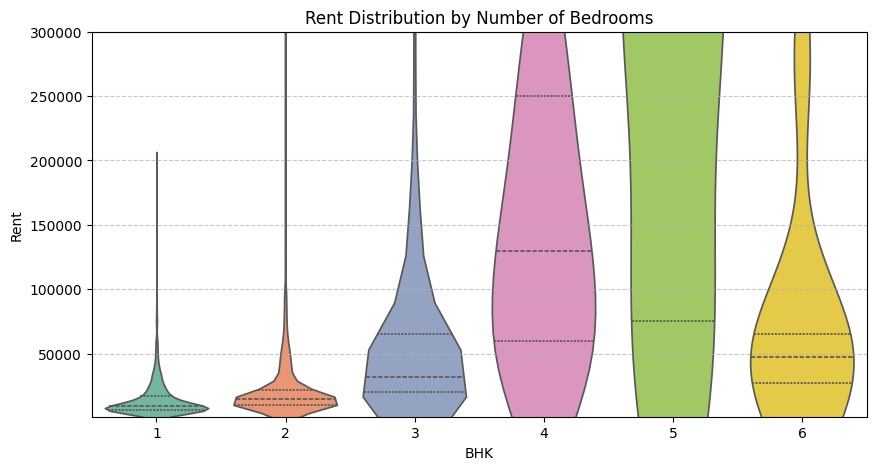

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(x="BHK", y="Rent", data=dataset, inner="quartile",palette='Set2')

# Set y-axis range (For example, 0 to 400,000)
plt.ylim(1000, 300000)

plt.title("Rent Distribution by Number of Bedrooms")
plt.ylabel("Rent")
plt.xlabel("BHK")
plt.grid(True, axis='y', linestyle="--", alpha=0.7)
plt.show()

# 6. How does the rent vary with the area type?

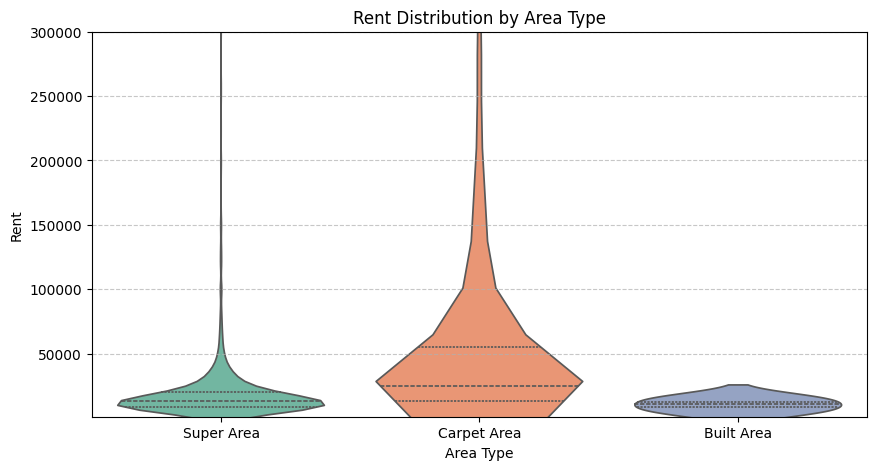

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(x="Area Type", y="Rent", data=dataset, inner="quartile",palette='Set2')

# Set y-axis range (For example, 0 to 400,000)
plt.ylim(1000, 300000)

plt.title("Rent Distribution by Area Type")
plt.ylabel("Rent")
plt.xlabel("Area Type")
plt.grid(True, axis='y', linestyle="--", alpha=0.7)
plt.show()

# 7. How does rent vary by city?

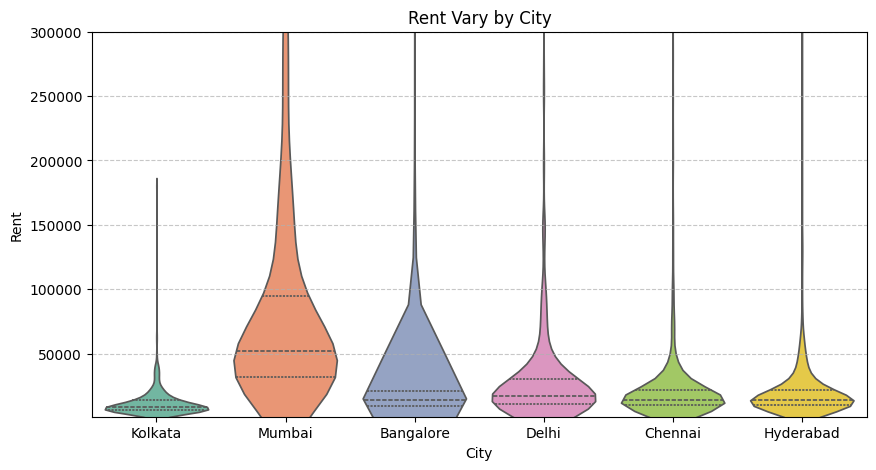

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(x="City", y="Rent", data=dataset, inner="quartile",palette='Set2')

# Set y-axis range (For example, 0 to 400,000)
plt.ylim(1000, 300000)

plt.title("Rent Vary by City")
plt.ylabel("Rent")
plt.xlabel("City")
plt.grid(True, axis='y', linestyle="--", alpha=0.7)
plt.show()

# 8. What is the correlation (relationship) between Rent and Size?

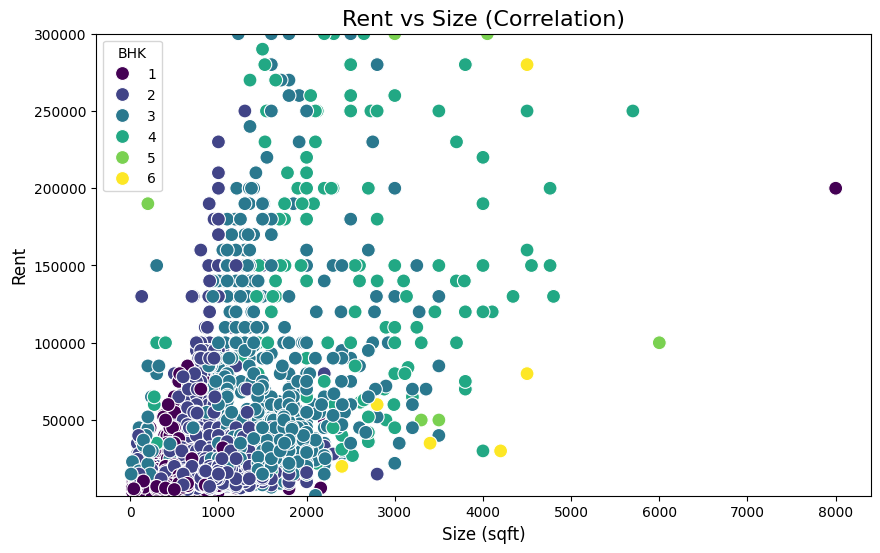

Correlation between Rent and Size: 0.4135507582245197


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#Scatter plot of Rent vs Size with color variation based on BHK (number of bedrooms)

#Scatter plot of Rent vs Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Size'], y=dataset['Rent'],hue=dataset['BHK'], palette='viridis', edgecolor='w', s=100)

#Set y-axis range (For example, 0 to 300,000)
plt.ylim(1000, 300000)

# Title and Labels
plt.title('Rent vs Size (Correlation)', fontsize=16)
plt.xlabel('Size (sqft)', fontsize=12)
plt.ylabel('Rent', fontsize=12)

# Show the plot
plt.show()

#Correlation coefficient
correlation = dataset[['Rent', 'Size']].corr()
print(f"Correlation between Rent and Size: {correlation.iloc[0, 1]}")

# 9. How does `Rent` vary with the number of `Bathrooms`?

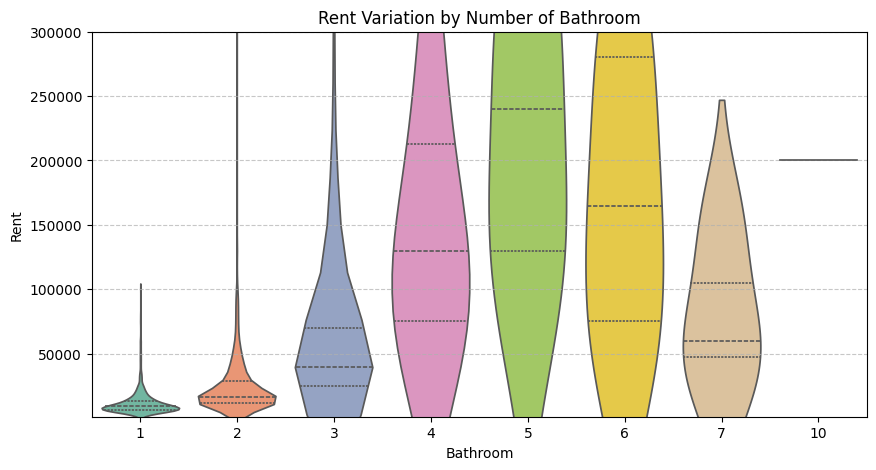

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.violinplot(x="Bathroom", y="Rent", data=dataset, inner="quartile",palette='Set2')

# Set y-axis range (For example, 0 to 400,000)
plt.ylim(1000, 300000)

plt.title("Rent Variation by Number of Bathroom")
plt.ylabel("Rent")
plt.xlabel("Bathroom")
plt.grid(True, axis='y', linestyle="--", alpha=0.7)
plt.show()

# 10. What is the relationship between Tenant Preferred and Rent?

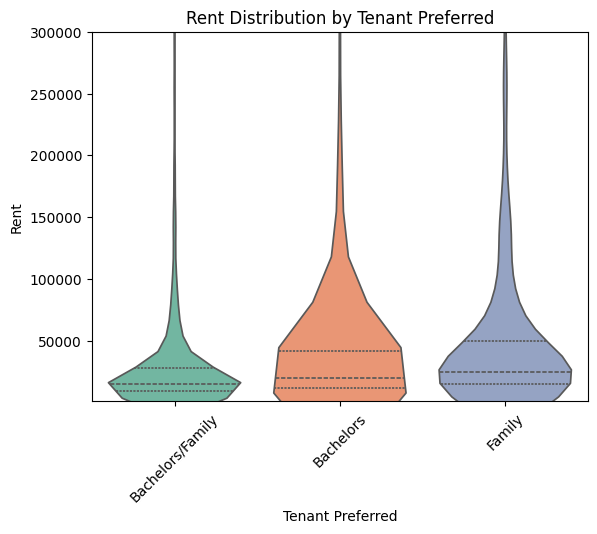

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x='Tenant Preferred', y='Rent', data=dataset, inner="quartile",palette='Set2')
# Set y-axis range (For example, 0 to 400,000)
plt.ylim(1000, 300000)

plt.title('Rent Distribution by Tenant Preferred')
plt.xlabel('Tenant Preferred')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()


In [16]:
#Calculate Mean Rent by Tenant Preferred*:
#This will give us the average rent for each category in Tenant Preferred.
# Calculate the mean rent for each Tenant Preferred category
mean_rent_by_tenant_preference = dataset.groupby('Tenant Preferred')['Rent'].mean()
print(mean_rent_by_tenant_preference)


Tenant Preferred
Bachelors           42143.793976
Bachelors/Family    31210.792683
Family              50020.341102
Name: Rent, dtype: float64


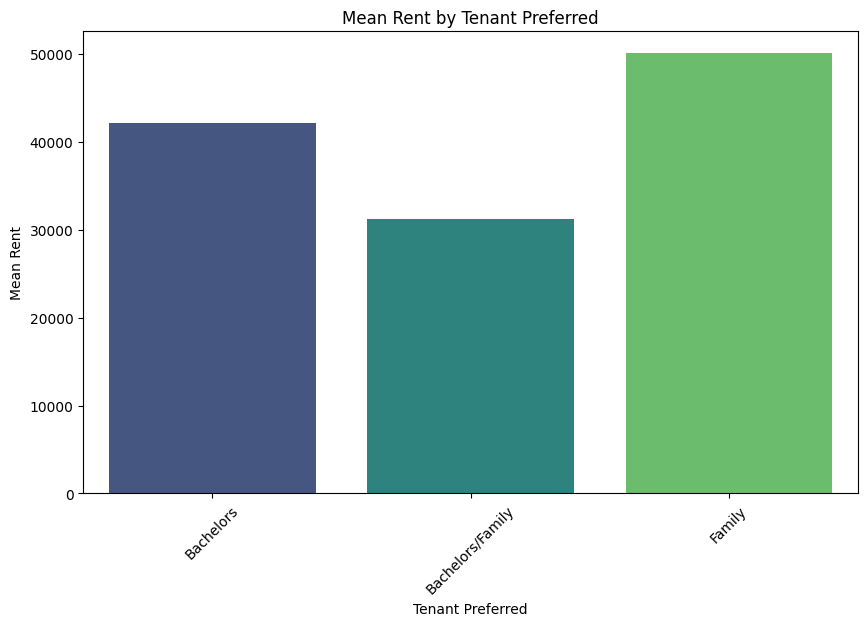

In [17]:
# Plot the Mean Rent by Tenant Preferred

#Plotting the mean Rent for each Tenant Preferred category
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_rent_by_tenant_preference.index, y=mean_rent_by_tenant_preference.values, palette='viridis')
plt.title('Mean Rent by Tenant Preferred')
plt.xlabel('Tenant Preferred')
plt.ylabel('Mean Rent')
plt.xticks(rotation=45)
plt.show()

# 11. What is the general distribution of the Size column?

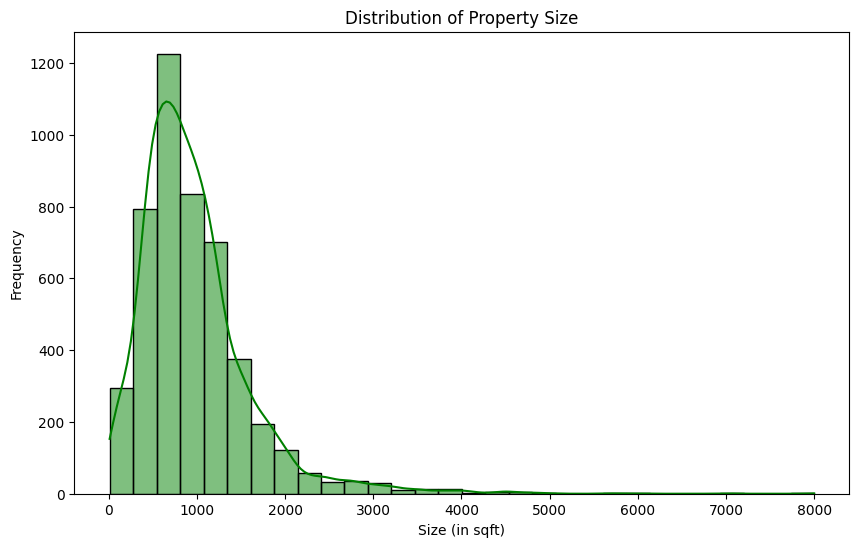

In [18]:
# Distribution of Size
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Size'], kde=True, color='green', bins=30)
plt.title('Distribution of Property Size')
plt.xlabel('Size (in sqft)')
plt.ylabel('Frequency')
plt.show()


# 12.How many properties are listed for each floor?

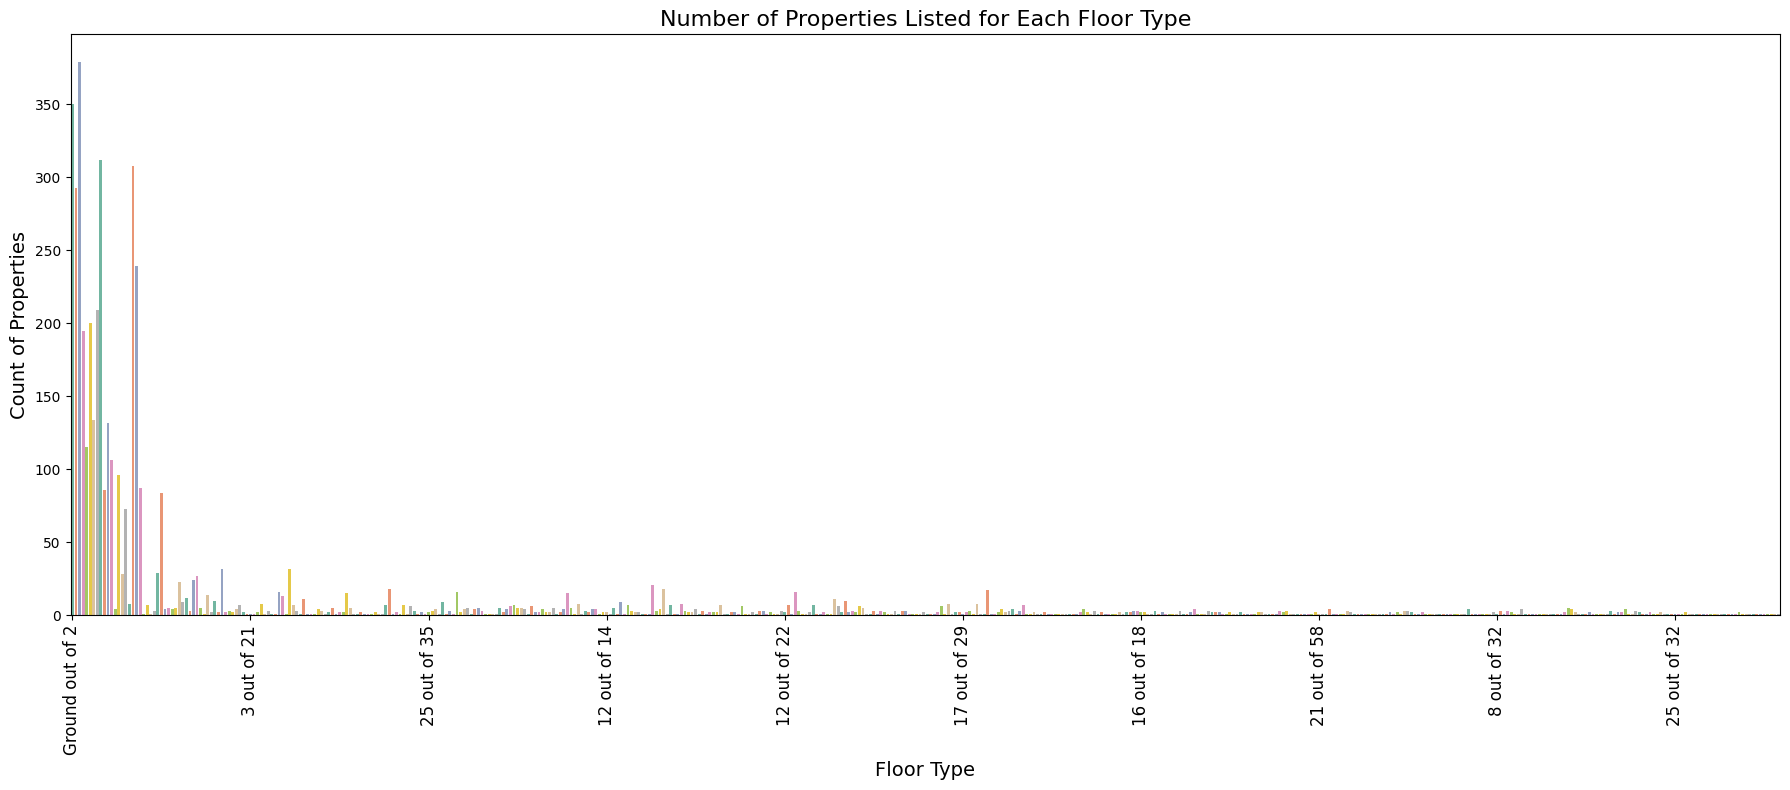

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Count plot to visualize the number of properties listed for each floor type
plt.figure(figsize=(18, 8))  # Increase figure size to give space for x-axis labels

sns.countplot(x='Floor', data=dataset, palette='Set2')

#Title and axis labels
plt.title('Number of Properties Listed for Each Floor Type', fontsize=16)
plt.xlabel('Floor Type', fontsize=14)
plt.ylabel('Count of Properties', fontsize=14)

#Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90, ha='center', fontsize=12)

#Set the x-axis to allow a better spacing of the labels
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

#Ensure labels don't get clipped
plt.tight_layout()

#Show the plot
plt.show()